<a href="https://colab.research.google.com/github/NithderP/NithderP/blob/main/Yves_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
# dataset link : https://www.kaggle.com/datasets/desalegngeb/students-exam-scores
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/NithderP/NithderP/main/Student_performance_expanded_data_with_more_features2.csv")


In [100]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,less than 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,btw 5 and 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,less than 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,btw 5 and 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,btw 5 and 10,76,78,75


In [101]:
df1 = df.drop('Unnamed: 0', axis=1)

In [102]:
df1['TotalScore'] = df1['MathScore'] + df1['ReadingScore'] + df1['WritingScore']

df1.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,less than 5,71,71,74,216
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,btw 5 and 10,69,90,88,247
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,less than 5,87,93,91,271
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,btw 5 and 10,45,56,42,143
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,btw 5 and 10,76,78,75,229


In [103]:
df = df1
df.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,less than 5,71,71,74,216
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,btw 5 and 10,69,90,88,247
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,less than 5,87,93,91,271
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,btw 5 and 10,45,56,42,143
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,btw 5 and 10,76,78,75,229


**Summary statistics of data set**

In [104]:

# Display summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
NrSiblings,29069.0,2.145894,1.458242,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0
TotalScore,30641.0,204.354558,43.362980,27.0,175.0,205.0,236.0,300.0


**Check data types**

In [105]:
# Get the data types of each column
data_types = df.dtypes
data_types

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
TotalScore               int64
dtype: object

**Check missing values**

In [106]:
# Check for missing values
print(df.isnull().sum())

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
TotalScore                0
dtype: int64


**Bar plots and histogram to view insights of features**

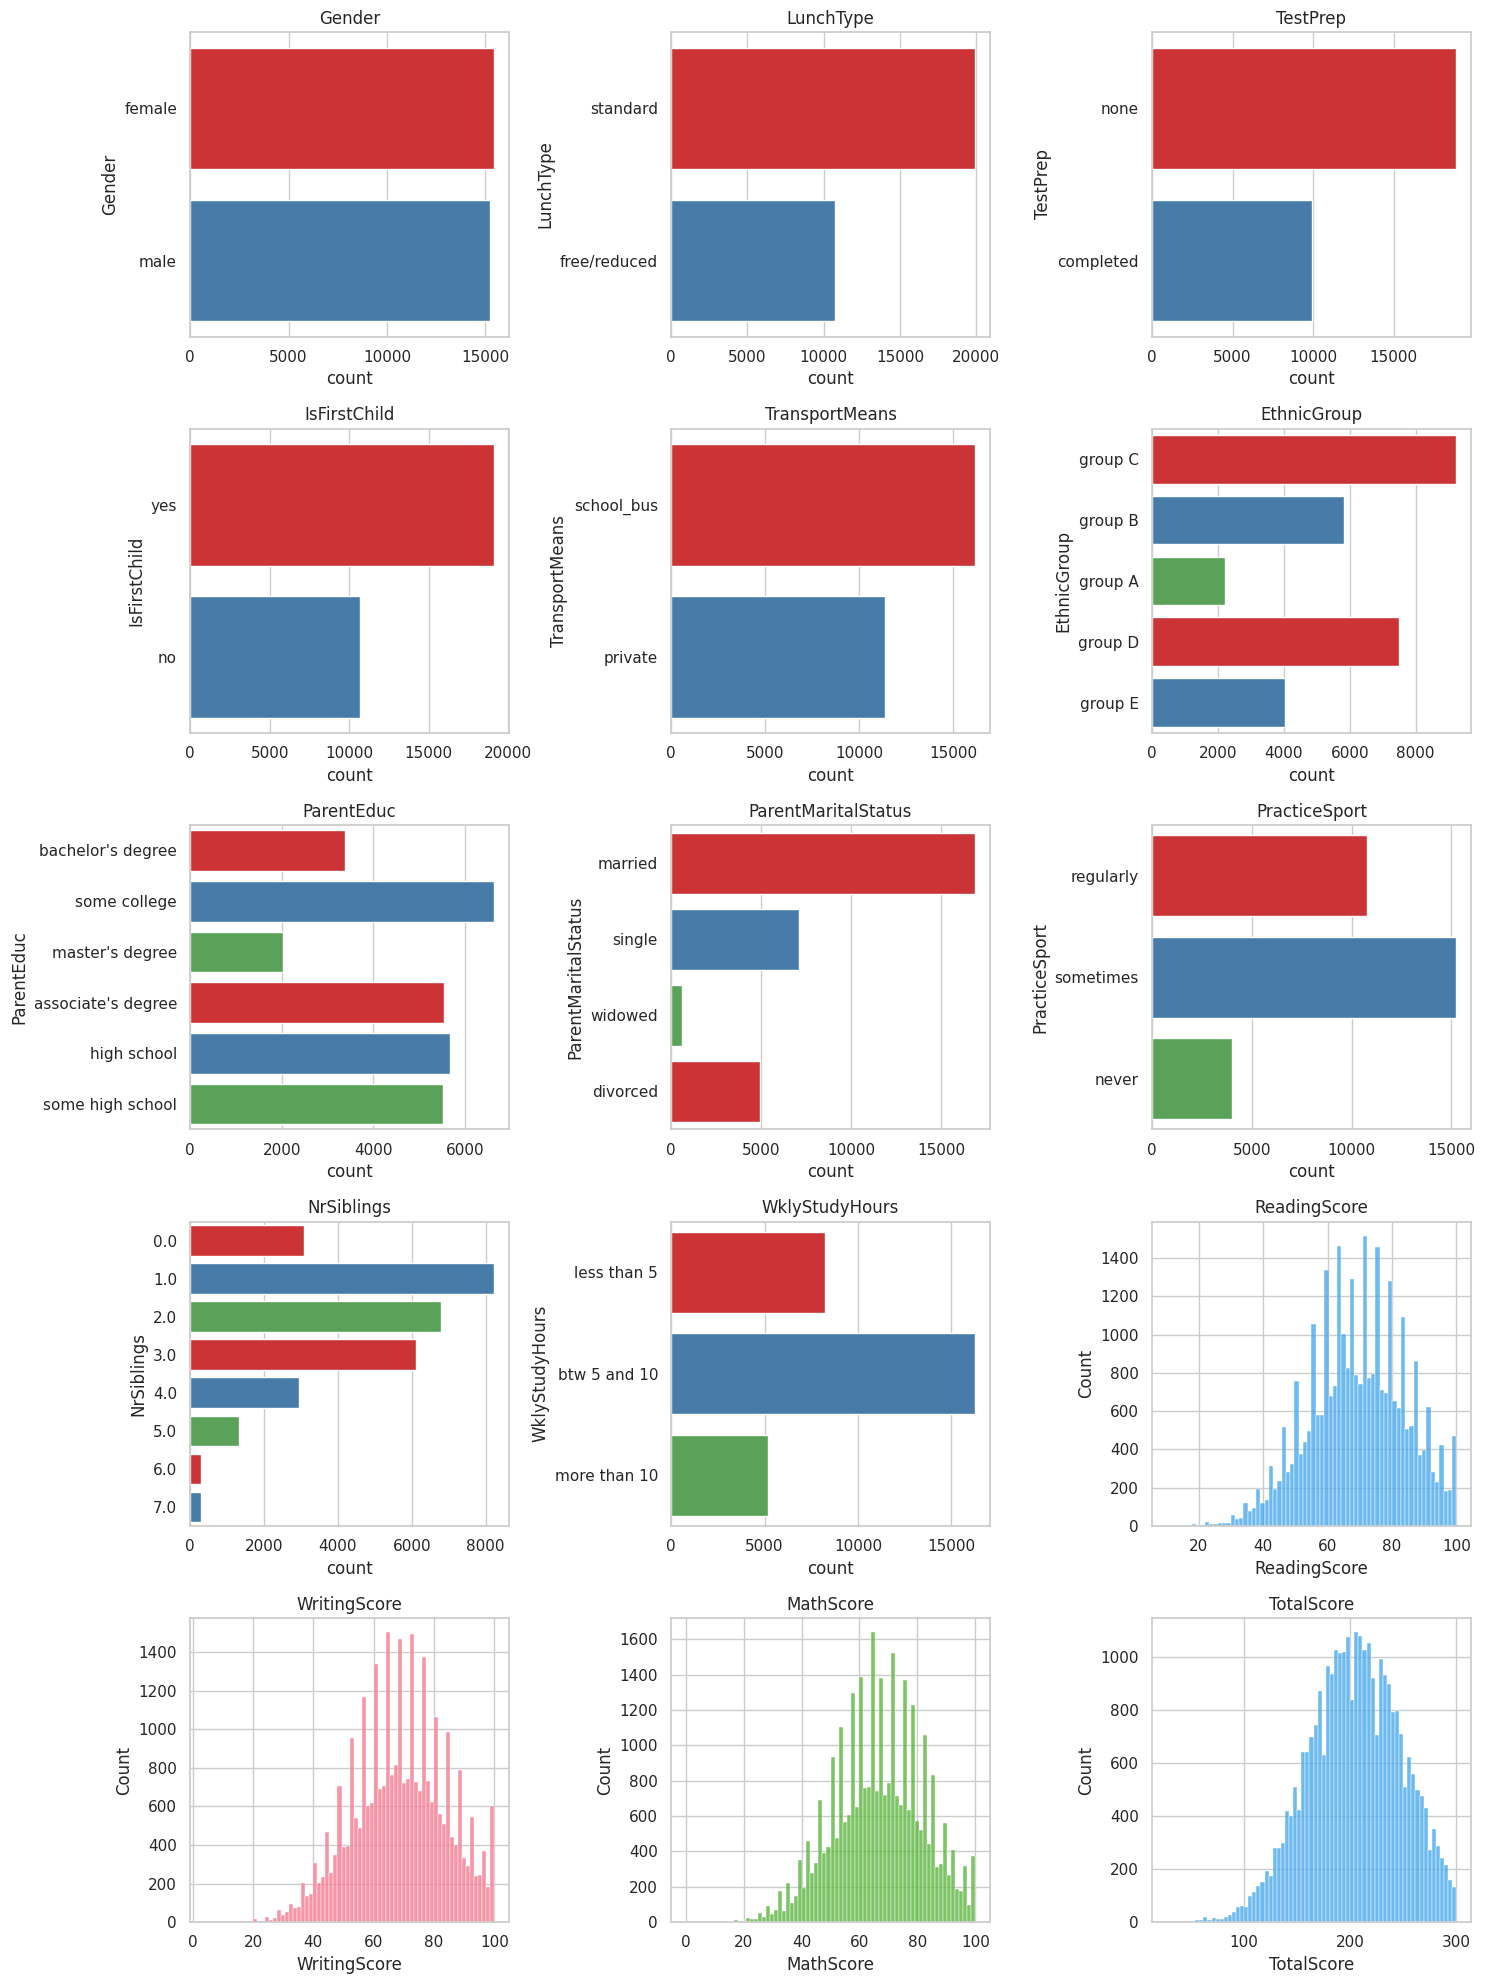

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Categorical (binary) variables
binary_categorical_vars = ['Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'TransportMeans']

# Categorical (multi-value) variables
multi_value_categorical_vars = ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport', 'NrSiblings', 'WklyStudyHours']

# Numerical variables
numerical_vars = ['ReadingScore', 'WritingScore', 'MathScore', 'TotalScore']

# Combine all variables
all_vars = binary_categorical_vars + multi_value_categorical_vars + numerical_vars

# Set the number of columns for each row
num_columns_per_row = 3

# Calculate the number of rows needed
num_rows = len(all_vars) // num_columns_per_row
if len(all_vars) % num_columns_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns_per_row, figsize=(15, 4*num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Generate color palettes with medium brightness
colors_categorical = sns.color_palette("Set1", n_colors=num_columns_per_row)
colors_numerical = sns.color_palette("husl", n_colors=num_columns_per_row)

# Plot horizontal bar plots for each categorical variable
for i, var in enumerate(all_vars):
    row_index = i // num_columns_per_row
    col_index = i % num_columns_per_row

    # Countplot for binary variables
    if var in binary_categorical_vars:
        sns.countplot(y=var, data=df, palette=colors_categorical, ax=axes[row_index, col_index])
    # Countplot for multi-value variables
    elif var in multi_value_categorical_vars:
        sns.countplot(y=var, data=df, palette=colors_categorical, ax=axes[row_index, col_index])
    # Histogram for numerical variables
    else:
        sns.histplot(df[var], color=colors_numerical[col_index], kde=False, ax=axes[row_index, col_index])

    # Set title
    axes[row_index, col_index].set_title(var)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

# Adjust the figure size based on your preference
plt.figure(figsize=(15, 6))

# Plot the distribution of 'total_marks'
sb.distplot(df['TotalScore'], bins=40, color='blue')

# Add labels and title for better clarity
plt.xlabel('TotalScore')
plt.ylabel('Frequency')
plt.title('Distribution of Total Score')

# Show the plot
plt.show()

**Imputing missing values**

In [108]:
import pandas as pd

# Assuming 'df' is your original dataframe

# Categorical (binary) variables
binary_categorical_vars = ['Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'TransportMeans']

# Categorical (multi-value) variables
multi_value_categorical_vars = ['EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport', 'NrSiblings', 'WklyStudyHours']

# Combine all categorical variables
all_categorical_vars = binary_categorical_vars + multi_value_categorical_vars

# Create a new dataframe 'clean_df' by copying the original dataframe 'df'
clean_df = df.copy()

# Impute missing values with the mode for each categorical variable in 'clean_df'
for var in all_categorical_vars:
    mode_value = clean_df[var].mode()[0]  # Get the mode (most frequent value)
    clean_df[var] = clean_df[var].fillna(mode_value)

# Check for any null values in the 'clean_df' dataframe
null_values = clean_df.isnull().sum()

# Display the null values (if any)
print("Null values in 'clean_df':")
print(null_values)

Null values in 'clean_df':
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
TotalScore             0
dtype: int64


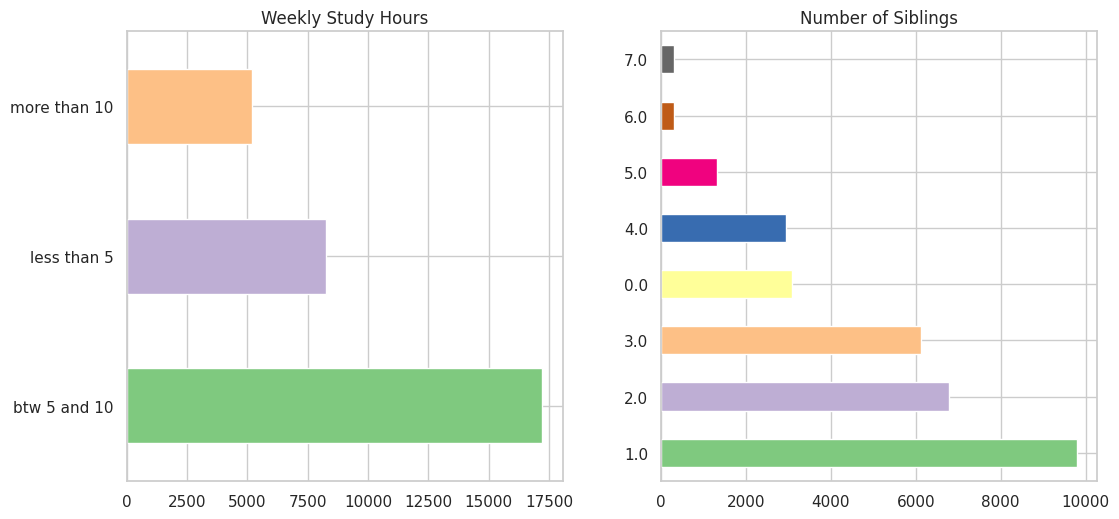

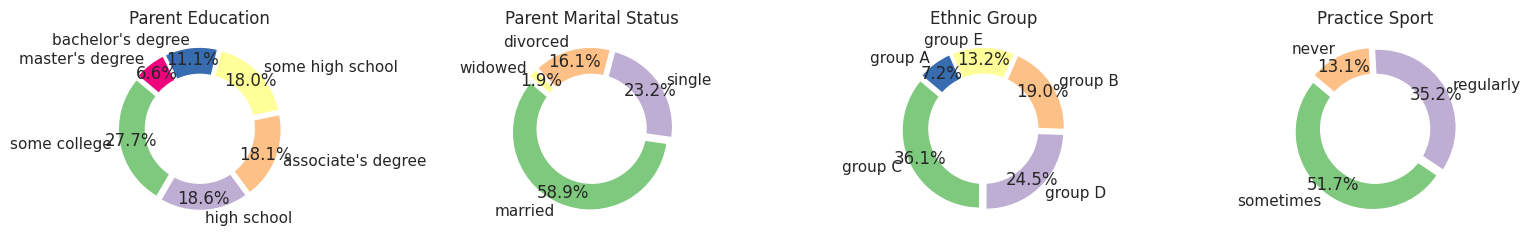

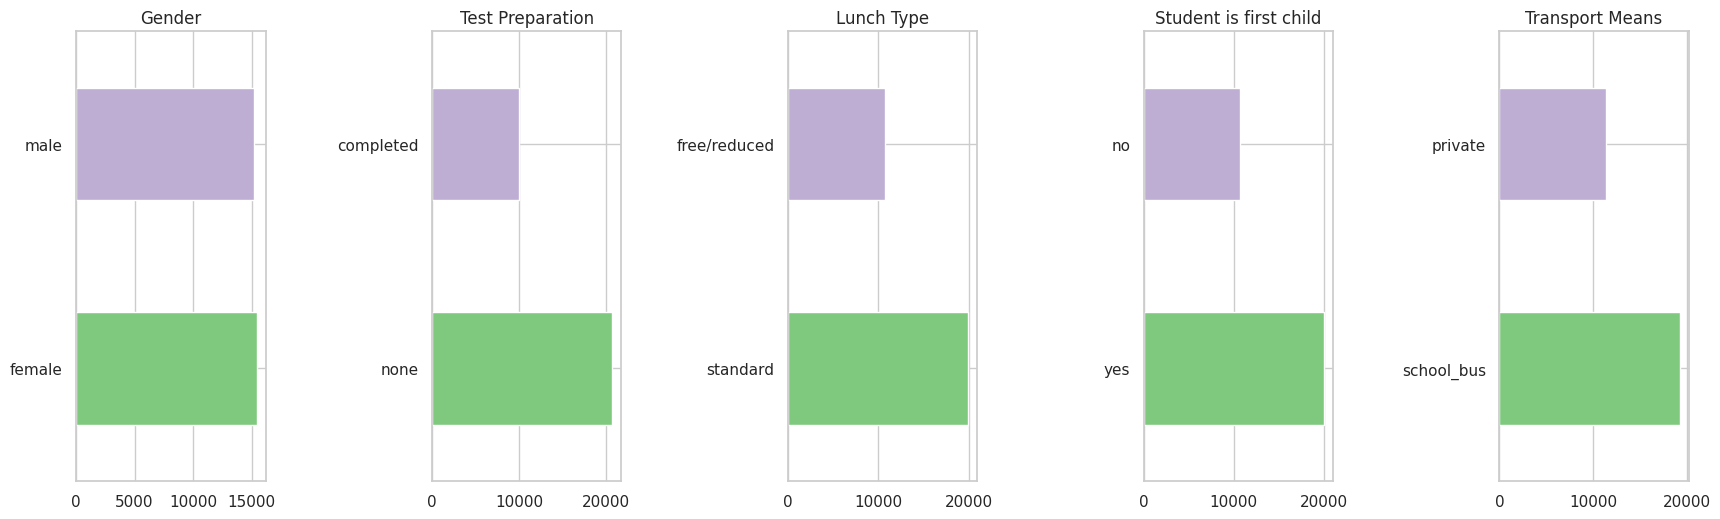

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
sns.set_palette('Accent')

# Bar plots for 'WklyStudyHours' and 'NrSiblings'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
clean_df['WklyStudyHours'].value_counts().plot(kind='barh', color=sns.color_palette())
plt.title('Weekly Study Hours')
plt.subplot(1, 2, 2)
clean_df['NrSiblings'].value_counts().plot(kind='barh', color=sns.color_palette())
plt.title('Number of Siblings')
plt.tight_layout(pad=3.0)  # Increase space between plots
plt.show()

# Pie charts for 'ParentEduc', 'ParentMaritalStatus', 'EthnicGroup', and 'PracticeSport'
fig, ax = plt.subplots(1, 4, figsize=(16, 6))

# Parent Education pie chart
education_counts = clean_df['ParentEduc'].value_counts()
ax[0].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=[0.05]*len(education_counts))
ax[0].add_artist(plt.Circle((0, 0), 0.70, fc='white'))
ax[0].set_title('Parent Education')

# Parent Marital Status pie chart
marital_counts = clean_df['ParentMaritalStatus'].value_counts()
ax[1].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=[0.05]*len(marital_counts))
ax[1].add_artist(plt.Circle((0, 0), 0.70, fc='white'))
ax[1].set_title('Parent Marital Status')

# Ethnic Group pie chart
ethnic_counts = clean_df['EthnicGroup'].value_counts()
ax[2].pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=[0.05]*len(ethnic_counts))
ax[2].add_artist(plt.Circle((0, 0), 0.70, fc='white'))
ax[2].set_title('Ethnic Group')

# Practice Sport pie chart
sport_counts = clean_df['PracticeSport'].value_counts()
ax[3].pie(sport_counts, labels=sport_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=[0.05]*len(sport_counts))
ax[3].add_artist(plt.Circle((0, 0), 0.70, fc='white'))
ax[3].set_title('Practice Sport')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# Bar plots for 'Gender', 'TestPrep', 'LunchType', 'IsFirstChild', and 'TransportMeans'
plt.figure(figsize=(18, 6))
plt.subplot(1, 5, 1)
clean_df['Gender'].value_counts().plot(kind='barh', color=sns.color_palette()[:len(clean_df['Gender'].unique())])
plt.title('Gender')
plt.subplot(1, 5, 2)
clean_df['TestPrep'].value_counts().plot(kind='barh', color=sns.color_palette()[:len(clean_df['TestPrep'].unique())])
plt.title('Test Preparation')
plt.subplot(1, 5, 3)
clean_df['LunchType'].value_counts().plot(kind='barh', color=sns.color_palette()[:len(clean_df['LunchType'].unique())])
plt.title('Lunch Type')
plt.subplot(1, 5, 4)
clean_df['IsFirstChild'].value_counts().plot(kind='barh', color=sns.color_palette()[:len(clean_df['IsFirstChild'].unique())])
plt.title('Student is first child')
plt.subplot(1, 5, 5)
clean_df['TransportMeans'].value_counts().plot(kind='barh', color=sns.color_palette()[:len(clean_df['TransportMeans'].unique())])
plt.title('Transport Means')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

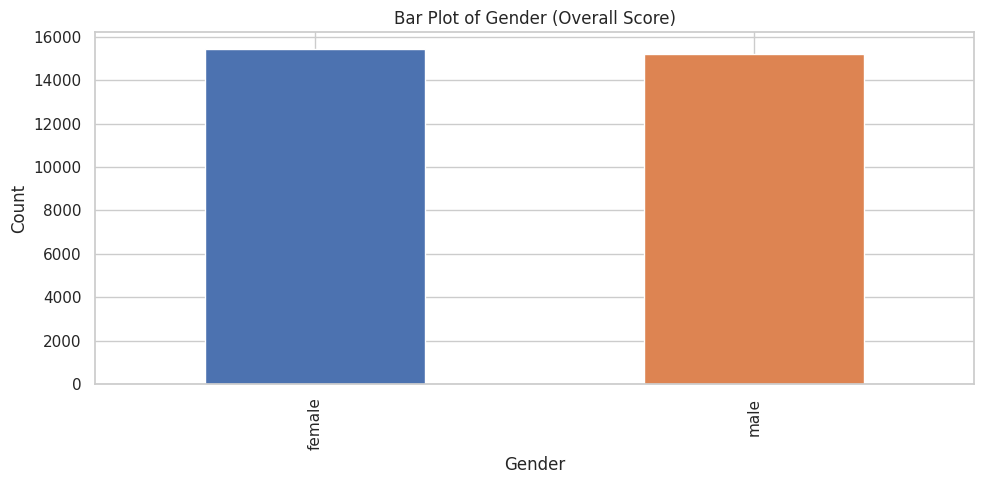

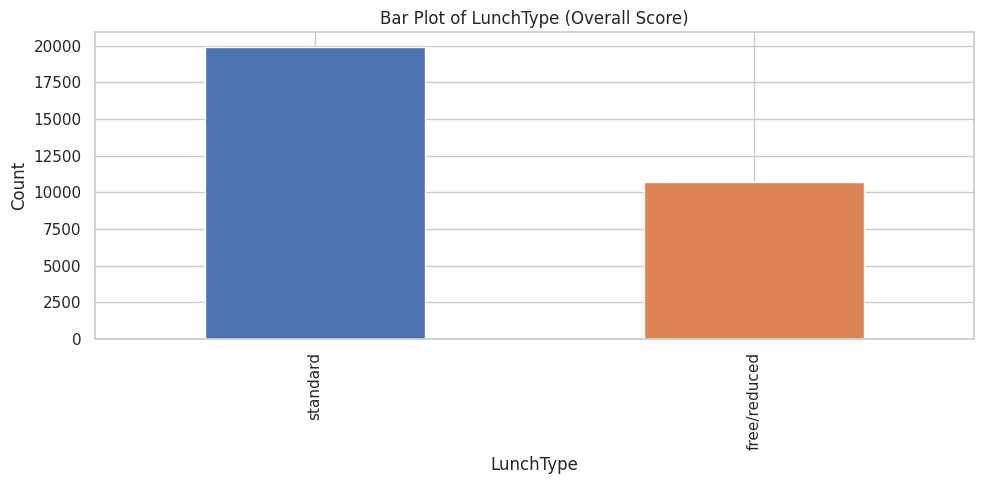

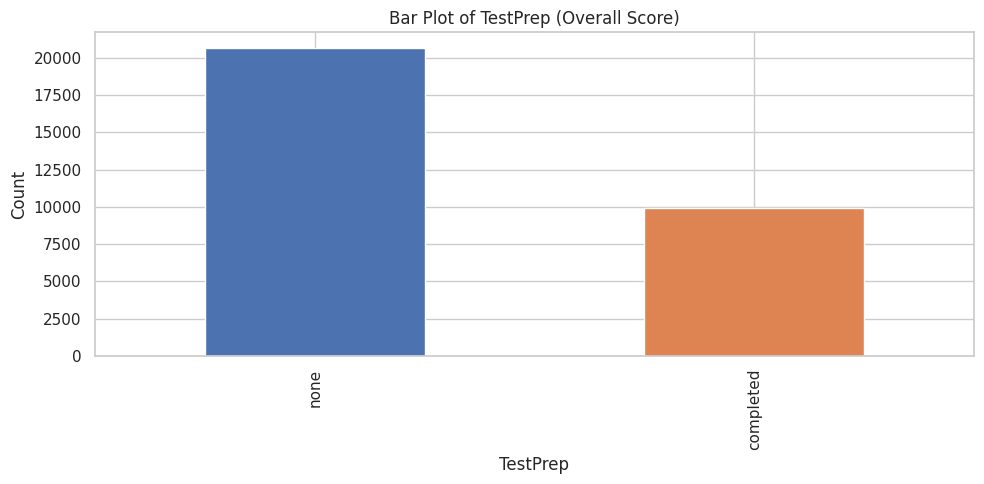

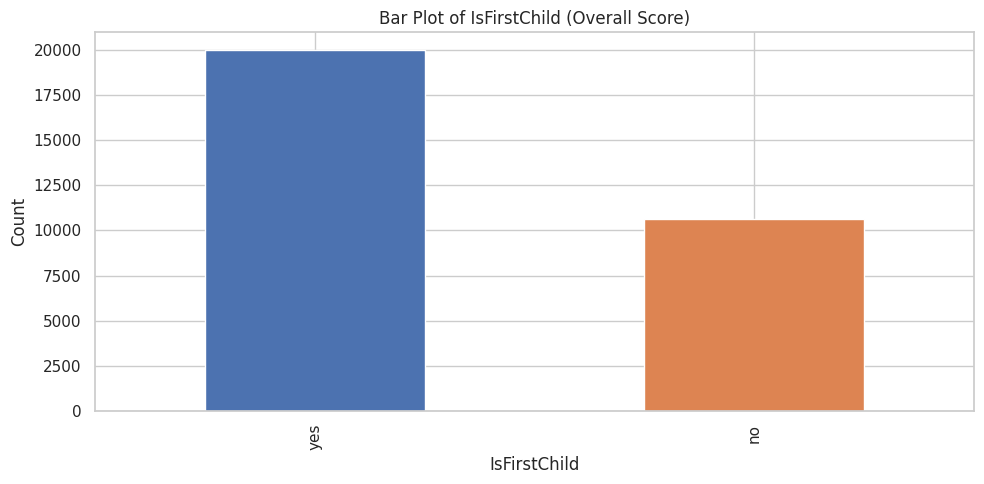

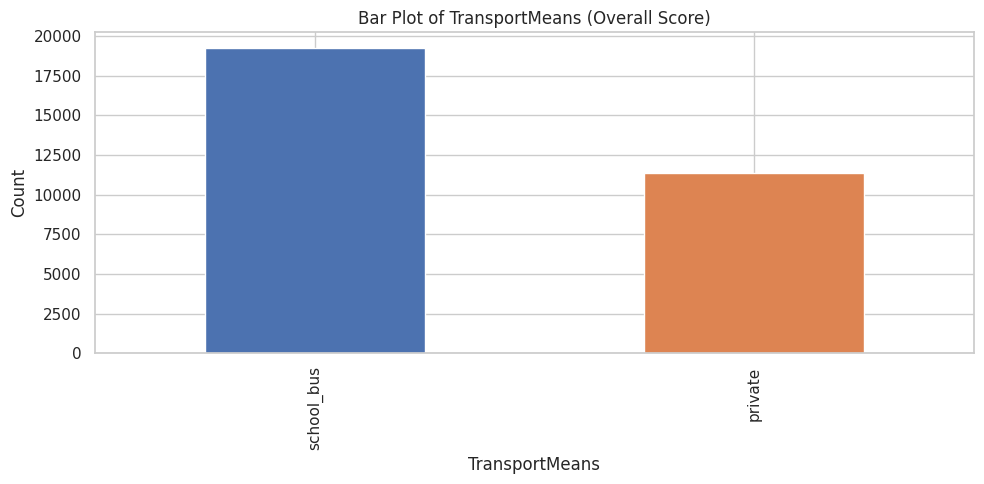

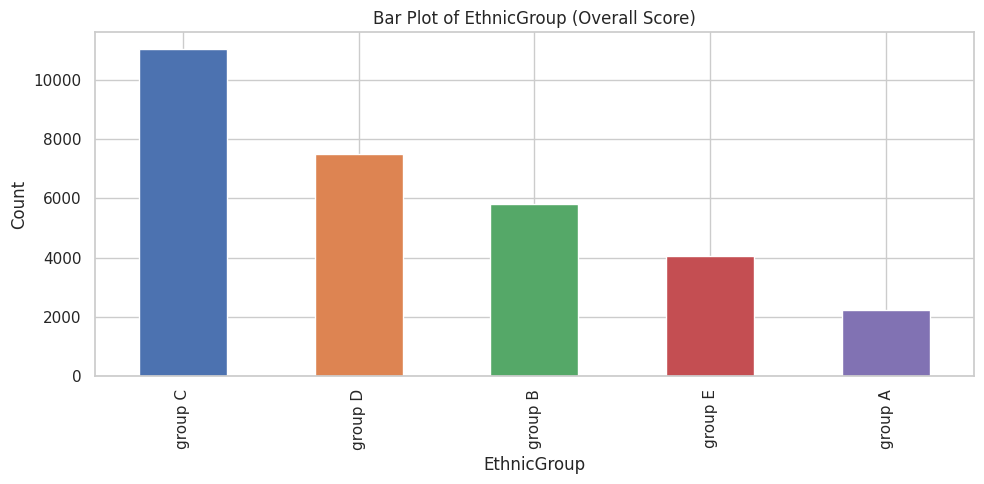

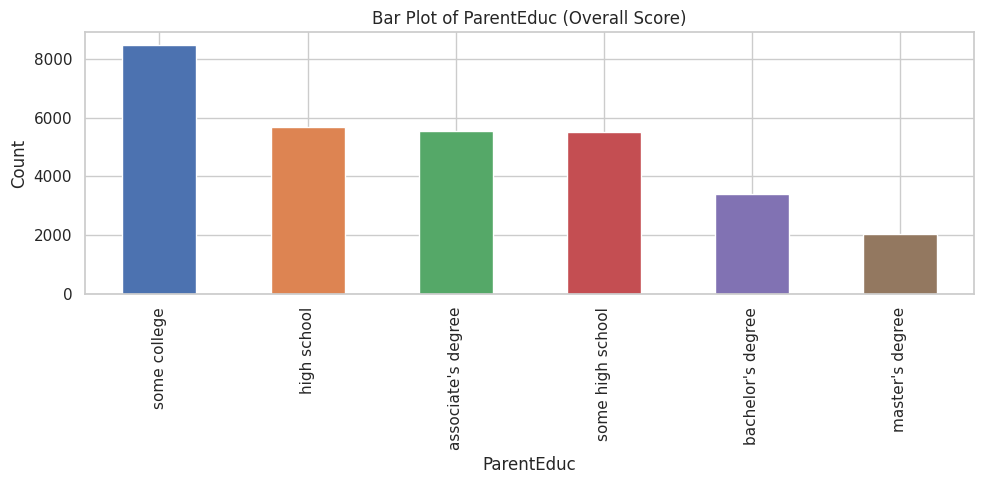

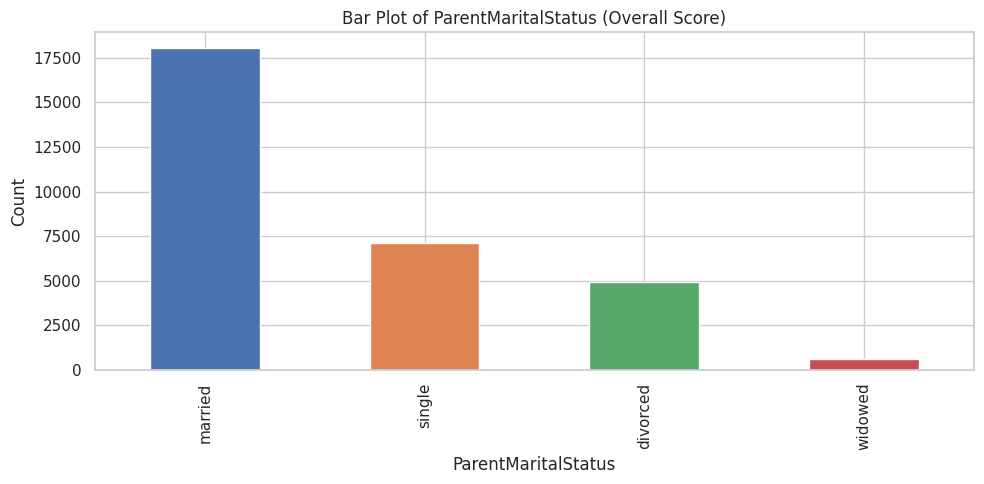

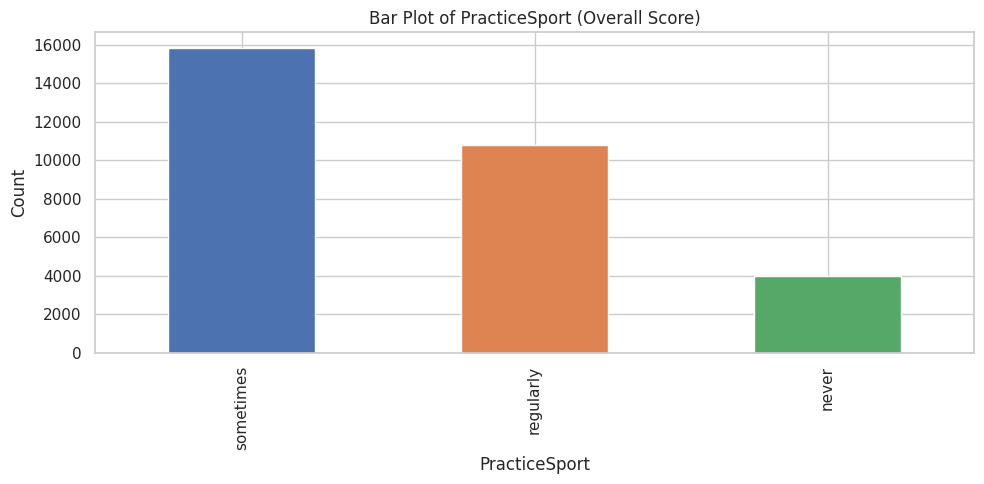

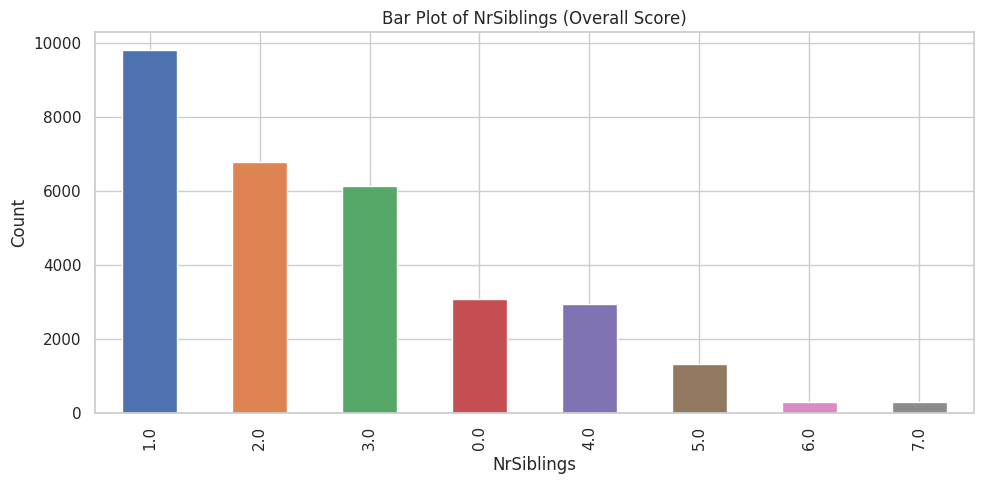

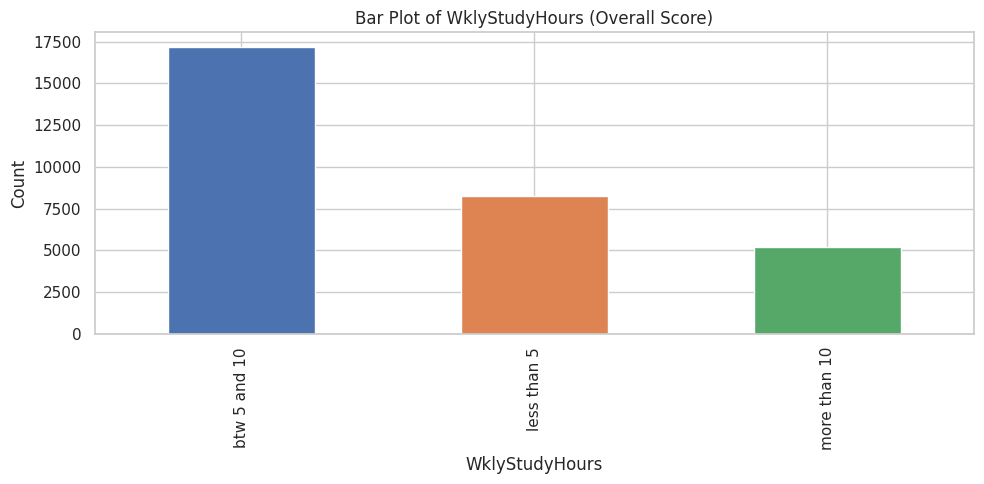

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical attributes
categorical_features = ['Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'TransportMeans',
                         'EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport',
                         'NrSiblings', 'WklyStudyHours']

# For each categorical attribute, create a bar plot
for attribute in categorical_features:
    plt.figure(figsize=(10, 5))
    clean_df[attribute].value_counts().plot(kind='bar', color=sns.color_palette())
    plt.title(f'Bar Plot of {attribute} (Overall Score)')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

**Encoding of categorical variables**

In [121]:
import pandas as pd

# Categorical features to one-hot encode
categorical_features = [ 'Gender', 'LunchType', 'TestPrep', 'IsFirstChild', 'TransportMeans',
                         'EthnicGroup', 'ParentEduc', 'ParentMaritalStatus', 'PracticeSport',
                         'NrSiblings', 'WklyStudyHours']

# Perform one-hot encoding
encoded_df = pd.get_dummies(clean_df, columns=categorical_features)

# Display the encoded dataframe
print("Encoded DataFrame:")
encoded_df

Encoded DataFrame:


,MathScore,ReadingScore,WritingScore,TotalScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,TestPrep_completed,TestPrep_none,...,NrSiblings_1.0,NrSiblings_2.0,NrSiblings_3.0,NrSiblings_4.0,NrSiblings_5.0,NrSiblings_6.0,NrSiblings_7.0,WklyStudyHours_btw 5 and 10,WklyStudyHours_less than 5,WklyStudyHours_more than 10
0,71,71,74,216,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,69,90,88,247,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,87,93,91,271,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,45,56,42,143,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,76,78,75,229,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,59,61,65,185,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
30637,58,53,51,162,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
30638,61,70,67,198,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
30639,82,90,93,265,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [122]:
# 'TransportMeans', 'Gender', 'EthnicGroup', 'TestPrep',

# Removing columns : Reading, Writing and Math

In [123]:
encoded_df1 = encoded_df.drop(columns=['MathScore', 'ReadingScore', 'WritingScore'])

encoded_df1.head()

,TotalScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard,TestPrep_completed,TestPrep_none,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,...,NrSiblings_1.0,NrSiblings_2.0,NrSiblings_3.0,NrSiblings_4.0,NrSiblings_5.0,NrSiblings_6.0,NrSiblings_7.0,WklyStudyHours_btw 5 and 10,WklyStudyHours_less than 5,WklyStudyHours_more than 10
0,216,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,247,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,271,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,143,0,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,229,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Splitting the data for train-test model**

In [124]:
from sklearn.model_selection import train_test_split

# Features
X = encoded_df1.drop(['TotalScore'], axis=1)


# Target variables
y = encoded_df1[['TotalScore']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**Linear regression model**

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the model performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1392.4086551404844
R-squared (R2): 0.26083664610252877


In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a Ridge regression model
ridge_model = Ridge()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge model with the best hyperparameters
best_model = Ridge(alpha=best_alpha)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Display the best model's performance metrics
print("Best Alpha:", best_alpha)
print("Mean Squared Error (MSE) - Best Model:", mse_best)
print("R-squared (R2) - Best Model:", r2_best)

Best Alpha: 10
Mean Squared Error (MSE) - Best Model: 1390.8978635553276
R-squared (R2) - Best Model: 0.2616386533085324


Visualisation of regression for OverallScore

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# Categorical features to one-hot encode
categorical_features = [ 'LunchType', 'IsFirstChild', 'TransportMeans',
                         'ParentEduc', 'ParentMaritalStatus', 'PracticeSport',
                         'NrSiblings', 'WklyStudyHours']

# Perform one-hot encoding
encoded_df = pd.get_dummies(clean_df, columns=categorical_features)

# Features (X) and Target variable (y)
X = encoded_df.drop(['TotalScore'], axis=1)
y = encoded_df[['TotalScore']]  # Updated to select 'OverallScore' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model fitting and prediction code (assuming you have it)

# Calculate residuals and predictions for 'OverallScore'
residuals_Total = y_test.values.flatten() - y_pred.flatten()
predictions_Total = y_pred.flatten()

# Set a consistent color palette
sns.set_palette("Set2")

# Define a function to create the plots for 'OverallScore'
def create_plots(score_name, residuals, predictions):
    plt.figure(figsize=(15, 5))

    # Plot Residuals
    plt.subplot(1, 4, 1)
    sns.scatterplot(x=predictions, y=residuals, color="g")
    plt.title(f'{score_name} Residual Plot')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')

    # Plot Actual vs. Predicted Values
    plt.subplot(1, 4, 2)
    plt.scatter(y_test.values.flatten(), predictions, color="b")
    plt.plot([y_test.values.min(), y_test.values.max()],
             [y_test.values.min(), y_test.values.max()], '--k', linewidth=2)
    plt.title(f'{score_name} Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Plot Distribution of Residuals
    plt.subplot(1, 4, 3)
    sns.histplot(residuals, kde=True, color="m")
    plt.title(f'{score_name} Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Plot Regression Diagnostics (QQ Plot)
    plt.subplot(1, 4, 4)
    probplot(residuals, plot=plt)
    plt.gca().get_lines()[0].set_color('c')
    plt.title(f'{score_name} Normal Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plots
    plt.show()

# Create plots for 'OverallScore'
create_plots('TotalScore', residuals_Total, predictions_Total)

# Decision Tree Model

Train Mean Squared Error: 335.86
Test Mean Squared Error: 2704.37
Train R^2 Score: 0.82
Test R^2 Score: -0.44


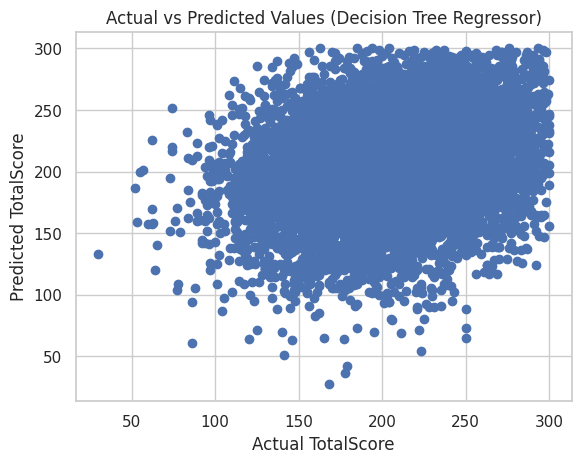

In [127]:
# Create a Decision Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = dt_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = dt_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse:.2f}")
print(f"Test Mean Squared Error: {test_mse:.2f}")

print(f"Train R^2 Score: {train_r2:.2f}")
print(f"Test R^2 Score: {test_r2:.2f}")

# Plot actual vs predicted values on the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual TotalScore")
plt.ylabel("Predicted TotalScore")
plt.title("Actual vs Predicted Values (Decision Tree Regressor)")
plt.show()


# Gradient Boosting Regressor

Train Mean Squared Error: 1384.70
Test Mean Squared Error: 1396.85
Train R^2 Score: 0.26
Test R^2 Score: 0.26


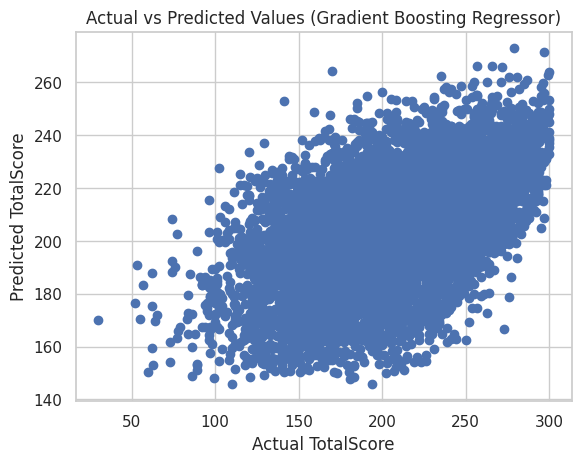

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to convert y_train to a 1D array

# Predictions on the training set
y_train_pred = gb_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = gb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse:.2f}")
print(f"Test Mean Squared Error: {test_mse:.2f}")

print(f"Train R^2 Score: {train_r2:.2f}")
print(f"Test R^2 Score: {test_r2:.2f}")

# Plot actual vs predicted values on the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual TotalScore")
plt.ylabel("Predicted TotalScore")
plt.title("Actual vs Predicted Values (Gradient Boosting Regressor)")
plt.show()


# Random Forest Regressor

Train Mean Squared Error: 476.28
Test Mean Squared Error: 1734.65
Train R^2 Score: 0.75
Test R^2 Score: 0.08


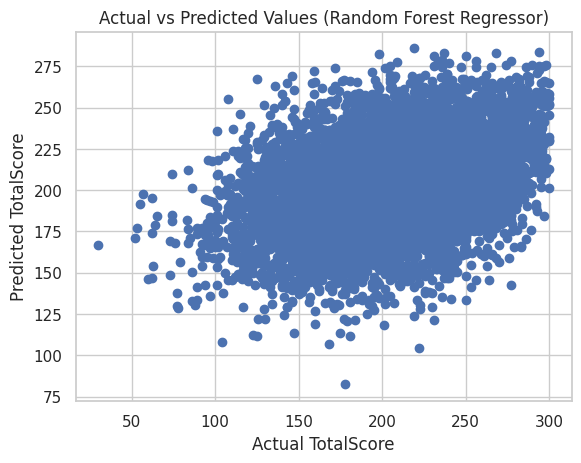

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to convert y_train to a 1D array

# Predictions on the training set
y_train_pred = rf_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse:.2f}")
print(f"Test Mean Squared Error: {test_mse:.2f}")

print(f"Train R^2 Score: {train_r2:.2f}")
print(f"Test R^2 Score: {test_r2:.2f}")

# Plot actual vs predicted values on the test set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual TotalScore")
plt.ylabel("Predicted TotalScore")
plt.title("Actual vs Predicted Values (Random Forest Regressor)")
plt.show()